# Project One

Team Members:





Project Description 

# Initial Code

## Libraries

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests

## Get data 

In [99]:
climate_df = pd.read_csv("climate_data.csv")
energy_df = pd.read_csv("energy_data.csv")
energy_cost_df = pd.read_csv("Tariffs_n_dates.csv")
production_df = pd.read_csv("production_data.csv")

# Unpivot raw energy data.
energy_df = energy_df.melt(id_vars=['Time stamp'],
                     var_name='device',
                     value_name='energy')
energy_df = energy_df.sort_values("Time stamp")

## Merge hourly data 

In [100]:
# Energy and Cost data
hourly_data = pd.merge(energy_df, energy_cost_df, how='left',
                      on="Time stamp")
hourly_data = hourly_data[["Time stamp",  "Date", "device", "energy","Price"]]
hourly_data["Total Cost"] = (hourly_data["energy"] 
                             * hourly_data["Price"])
hourly_data = hourly_data.drop("Price", axis=1)
hourly_data = hourly_data.sort_values("Date")
hourly_data.head()

,Time stamp,Date,device,energy,Total Cost
0,01/01/2020 00:00,01/01/2020,COMP_REF1,0.0000,0.000000
195,01/01/2020 16:00,01/01/2020,COMP_REF9,1.4900,2.474294
194,01/01/2020 16:00,01/01/2020,TUNEL1,0.1372,0.227834
193,01/01/2020 16:00,01/01/2020,TUNEL3,0.2318,0.384927
192,01/01/2020 16:00,01/01/2020,COMP_REF4,0.2772,0.460318


## Daily data 

In [101]:
# Energy, Production, Climate and Cost data
daily_data = hourly_data.groupby(by=["Date","device"], as_index=False).sum()
daily_data = pd.merge(daily_data, production_df, 
                      how='left', on='Date')
daily_data = pd.merge(daily_data, climate_df, 
                      how='left', on='Date')
daily_data["Date"] = pd.to_datetime(daily_data["Date"], dayfirst=True,  format="%d/%m/%Y")
daily_data.sort_values(by="Date", inplace=True)
daily_data.reset_index(drop=True, inplace=True)
daily_data.head()

,Date,device,energy,Total Cost,Product_A,Product_B,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
0,2019-03-01,COMP_REF1,6162.9256,8663.348872,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
1,2019-03-01,TUNEL3,5078.9900,7288.358004,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2,2019-03-01,TUNEL2,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
3,2019-03-01,TUNEL1,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
4,2019-03-01,COMP_REF9,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0


# Analysis 

## What are the main climate variables that affect the factory production? 

In [102]:
# José/Jorge

In [103]:
# Graficar producto A y B VS Climate 

In [104]:
from scipy.stats import linregress
import scipy.stats as st

In [105]:
def scatter_plot(xvalues, yvalues, zvalues, xlabel, ylabel, zlabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    (slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(xvalues, zvalues)
    regress_values = xvalues * slope + intercept
    regress_values_z = xvalues * slope2 + intercept2
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    line_eq_2 = "z = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    plt.plot(xvalues,regress_values_z,"b-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.annotate(line_eq_2,(lim_x_annot,yvalues.max()/3*2),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="red", alpha=0.5)
    plt.scatter(xvalues, zvalues, color="blue", alpha=0.5)
    plt.title(f"{xlabel} vs Production")
    plt.xlabel(xlabel)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)
    
    corr=round(st.pearsonr(xvalues,yvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,yvalues)
    print(f"""|{ylabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)
    corr=round(st.pearsonr(xvalues,zvalues)[0],2)
    Lin_Reg=st.linregress(xvalues,zvalues)
 
    print(f"""|{zlabel} Vs {xlabel}| 
    The correlation is {corr}
    The {Lin_Reg}
    """)

In [106]:
grouped_data = daily_data.groupby("Date")[["Product_A","Product_B","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
grouped_data

,Product_A,Product_B,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
Date,,,,,,,,,,
2019-03-01,357800.0,340036.200,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2019-03-02,323960.0,314865.300,21.0,6.0,0.0,37.0,20.0,3.0,20.0,20.0
2019-03-03,78460.0,20084.850,22.0,6.0,0.0,30.0,23.0,0.0,22.0,23.0
2019-03-04,200500.0,394474.275,22.0,6.0,0.0,34.0,22.0,2.0,22.0,22.0
2019-03-05,303460.0,425879.850,21.0,6.0,0.0,38.0,21.0,4.0,21.0,21.0
...,...,...,...,...,...,...,...,...,...,...
2020-02-25,468050.0,455990.900,20.0,5.0,0.0,34.0,20.0,2.0,20.0,20.0
2020-02-26,417640.0,431775.900,18.0,5.0,0.0,45.0,18.0,5.0,17.0,17.0
2020-02-27,377125.0,410920.426,13.0,4.0,0.0,49.0,14.0,2.0,13.0,13.0


|Product A Vs Temperature| 
    The correlation is 0.01
    The LinregressResult(slope=297.4392562909667, intercept=290906.770292002, rvalue=0.008205678099851831, pvalue=0.8756787158859454, stderr=1899.8464293295829)
    
|Product B Vs Temperature| 
    The correlation is -0.01
    The LinregressResult(slope=-510.36422516070706, intercept=326970.64977782866, rvalue=-0.011358102223937645, pvalue=0.8285536110280032, stderr=2355.026205474438)
    


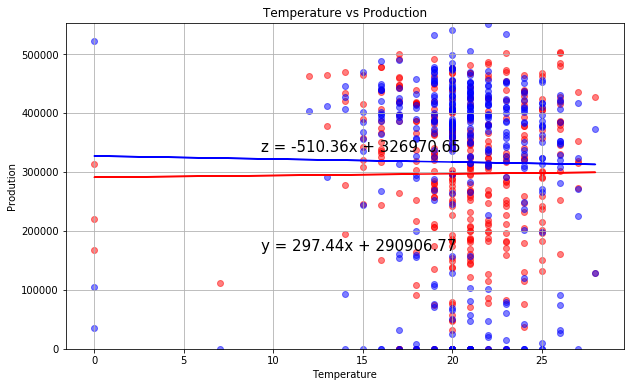

In [107]:
x_values = grouped_data["Temp"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Temperature"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Prodution")
plt.show()

|Product A Vs UV| 
    The correlation is 0.06
    The LinregressResult(slope=9292.532665648303, intercept=246730.56217308936, rvalue=0.06489530239119139, pvalue=0.215501324819531, stderr=7489.515417635501)
    
|Product B Vs UV| 
    The correlation is -0.03
    The LinregressResult(slope=-5832.88282252916, intercept=348040.0156022685, rvalue=-0.032860319011941655, pvalue=0.5308731118498913, stderr=9298.784486651564)
    


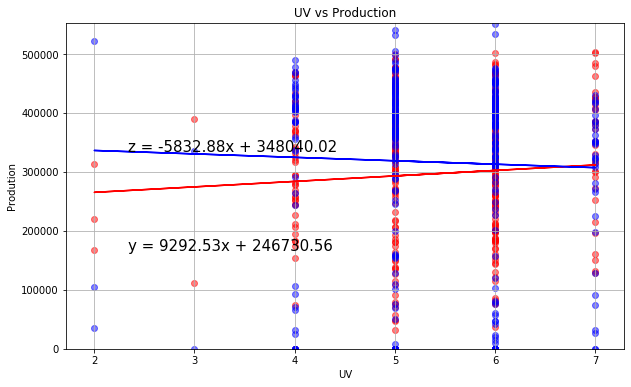

In [49]:
x_values = grouped_data["UV"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "UV"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Prodution")
plt.show()

|Product A Vs Humidity| 
    The correlation is -0.33
    The LinregressResult(slope=-2350.058283162386, intercept=414857.4112576856, rvalue=-0.32538006672795156, pvalue=1.7944249291540066e-10, stderr=357.9618958233764)
    
|Product B Vs Humidity| 
    The correlation is 0.07
    The LinregressResult(slope=643.2557782346104, intercept=284216.71599075594, rvalue=0.07184645860078616, pvalue=0.17019577671702446, stderr=468.0624913261332)
    


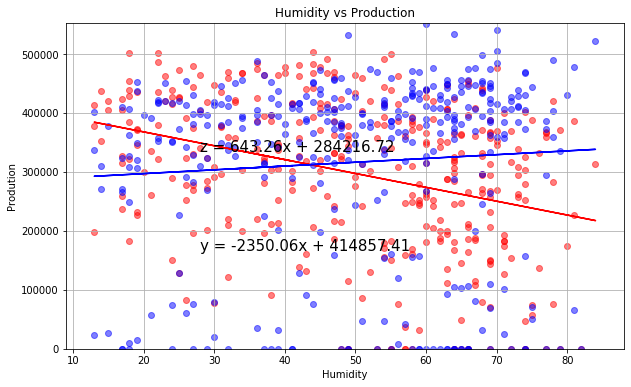

In [50]:
x_values = grouped_data["Hum"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Humidity"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Prodution")
plt.show()

|Product A Vs Precipitation mm| 
    The correlation is -0.24
    The LinregressResult(slope=-7069.499104706685, intercept=310748.81183055637, rvalue=-0.24343625542986602, pvalue=2.448681657942216e-06, stderr=1476.3428286745602)
    
|Product B Vs Precipitation mm| 
    The correlation is -0.05
    The LinregressResult(slope=-1678.8071339866358, intercept=319727.6760300112, rvalue=-0.046634441570328415, pvalue=0.3736798143242377, stderr=1884.8230046645358)
    


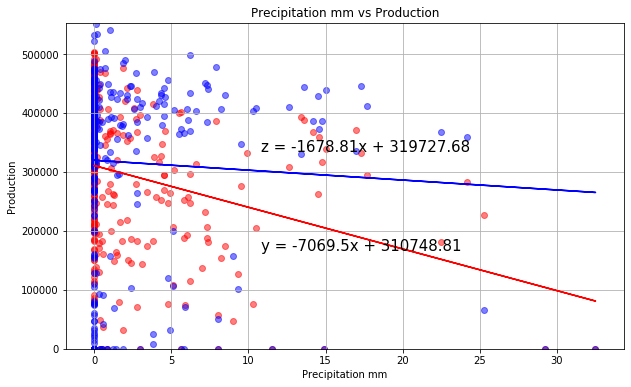

In [51]:
x_values = grouped_data["PrecMM"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Precipitation mm"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Production")
plt.show()

|Product A Vs Heat| 
    The correlation is -0.04
    The LinregressResult(slope=-1880.468523918468, intercept=335705.08200562355, rvalue=-0.0413526490451658, pvalue=0.4302557845362105, stderr=2381.4441032163704)
    
|Product B Vs Heat| 
    The correlation is -0.05
    The LinregressResult(slope=-2697.26709904097, intercept=371947.3539906569, rvalue=-0.047848748320489964, pvalue=0.3613518984892894, stderr=2951.2428805245854)
    


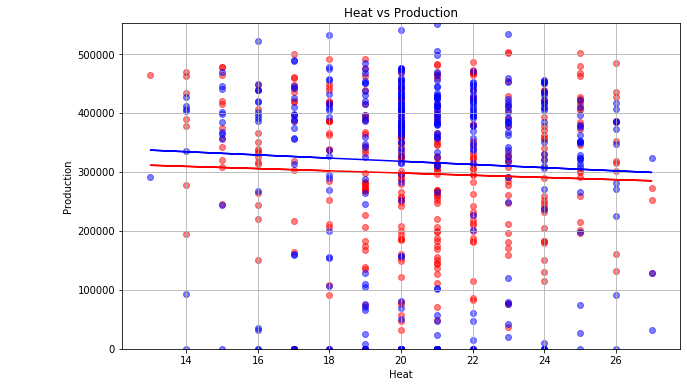

In [52]:
x_values = grouped_data["Heat"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Heat"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Production")
plt.show()

|Product A Vs Dew Point| 
    The correlation is -0.36
    The LinregressResult(slope=-7828.34185324266, intercept=354541.81477969815, rvalue=-0.35783488072248876, pvalue=1.6963672250637791e-12, stderr=1070.7380966144756)
    
|Product B Vs Dew Point| 
    The correlation is 0.06
    The LinregressResult(slope=1546.6182367325928, intercept=305106.143170563, rvalue=0.05703026318369269, pvalue=0.2765037744193915, stderr=1419.1217210870273)
    


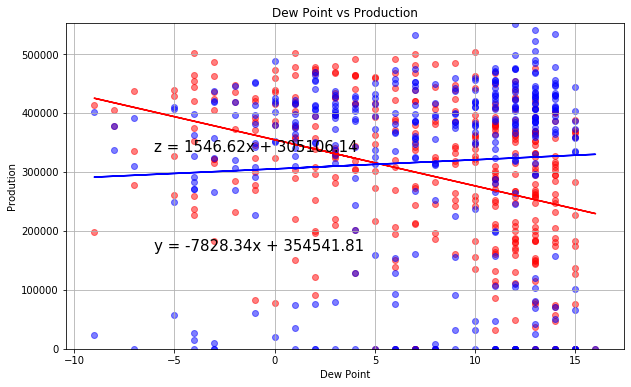

In [53]:
x_values = grouped_data["DP"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Dew Point"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Prodution")
plt.show()

|Product A Vs Wind Chill| 
    The correlation is -0.01
    The LinregressResult(slope=-453.76866533260414, intercept=306225.1439729579, rvalue=-0.010450023620781202, pvalue=0.8420732126099242, stderr=2275.845754155008)
    
|Product B Vs Wind Chill| 
    The correlation is -0.07
    The LinregressResult(slope=-3528.6521214056606, intercept=387996.652807947, rvalue=-0.06555426818916134, pvalue=0.21086763858682067, stderr=2815.2826784391473)
    


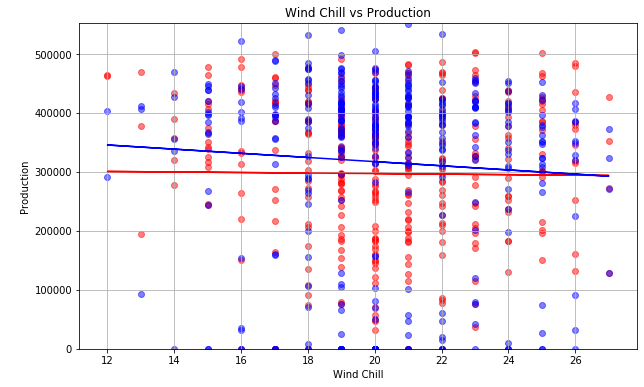

In [54]:
x_values = grouped_data["WChill"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Wind Chill"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Production")
plt.show()

|Product A Vs Feel Like| 
    The correlation is -0.02
    The LinregressResult(slope=-1018.5770686754266, intercept=317693.5690655293, rvalue=-0.023518815157066445, pvalue=0.6538181017137703, stderr=2269.3820690336056)
    
|Product B Vs Feel Like| 
    The correlation is -0.06
    The LinregressResult(slope=-3488.45621278387, intercept=387248.5810795984, rvalue=-0.06497767680579668, pvalue=0.21491812570419774, stderr=2808.0164435206734)
    


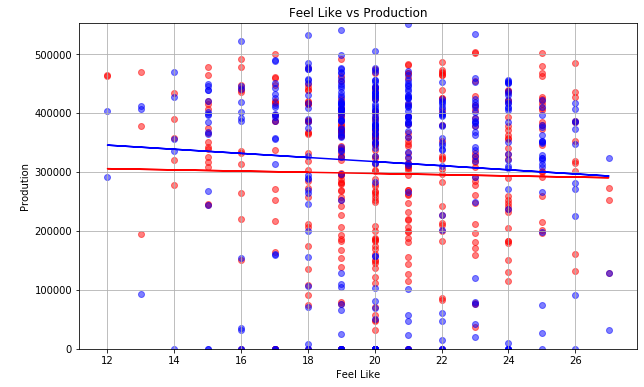

In [55]:
x_values = grouped_data["FLike"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
x_label = "Feel Like"
y_label = "Product A"
z_label = "Product B"
scatter_plot(x_values,y_values,z_values,x_label,y_label,z_label)
plt.ylabel("Prodution")
plt.show()

## What are the main climate variables that affect the energy consumption?

In [88]:
# José/Jorge

In [5]:
# Graficar devices VS climate

## How is it correlated the production and the energy consumption?

In [81]:
# Luis

In [6]:
# Graficas de scatter, correlación y regresión

## Define the energy consumption curve for each month of the year. 

In [82]:
# Luis

## Define the energy consumption curve for each season of the year.

In [83]:
# Lupita

## For each group of devices, rank them by cost.


In [84]:
# Lupita

## Anual base line for each device.  

In [89]:
# Daniel

## Make production recommendations, based on the optimal production. 

In [86]:
# Daniel